In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Section 1 - Bar Charts

### 1.1 -Compare fuses, treat on and off axis the same

In [2]:
## mix on and off axis

silver_fuse_I = [940.5,1028.5,856.6,794.6]
aged_fuse_I = [711.1,826.2]
annealed_fuse_I = [812.2,837.7]
heat_sink_fuse_I = [1048.2,844.3]

al_seed_fuse_I = [976.3,929.4,912.6,1004.7,794.2]
al_cap_fuse_I = [1102,1072.9,1115.7,1128.8,1150]
al_sandwich_fuse_I = [1062.2,1107.5]

In [3]:
## mix on and off axis

silver_fuse_temp = [102.81,99.81,98,76.86]
aged_fuse_temp = [71.81,86.56]
annealed_fuse_temp = [83.94,105.37]
heat_sink_fuse_temp = [105.63,83.37]

al_seed_fuse_temp = [101,93.94,127.94,81.94,103,106,103.69,93.69]
al_cap_fuse_temp = [127.94,127.94,106.75,115.25,123.62]
al_sandwich_fuse_temp = [127.94,122]

In [4]:
## plot bar chart of fuses

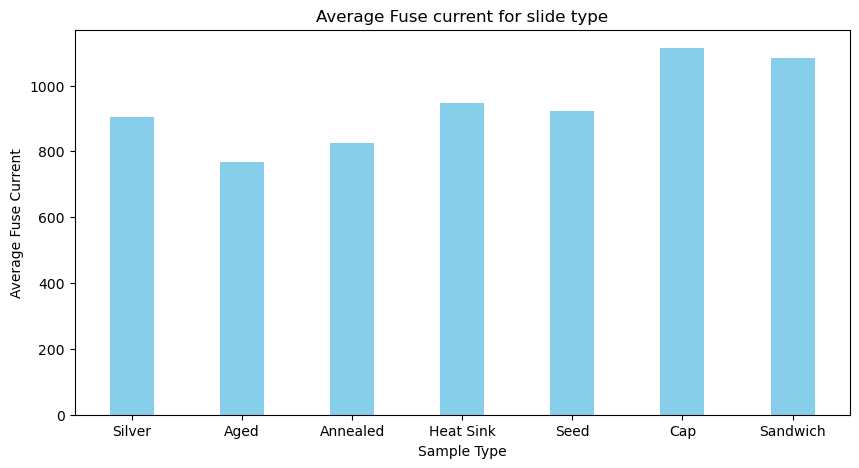

In [5]:
data = {'Silver':np.mean(silver_fuse_I),'Aged':np.mean(aged_fuse_I) ,'Annealed':np.mean(annealed_fuse_I) ,'Heat Sink': np.mean(heat_sink_fuse_I),'Seed':np.mean(al_seed_fuse_I), 'Cap':np.mean(al_cap_fuse_I), 
        'Sandwich':np.mean(al_sandwich_fuse_I)}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='skyblue', 
        width = 0.4)
 
plt.xlabel("Sample Type")
plt.ylabel("Average Fuse Current")
plt.title("Average Fuse current for slide type")
plt.show()

In [7]:
def percentage_increase(new_mean):
    avg_silver = np.mean(silver_fuse_I)
    
    per_diff = (new_mean-avg_silver)/(avg_silver)*100
    return (per_diff)

In [8]:
def error_prop_percentage(x,y,dx,dy):

    err = (y/x**2)**2*(dx)**2+(100/x)**2*(dy)**2
    errs = np.sqrt(err)
    return errs

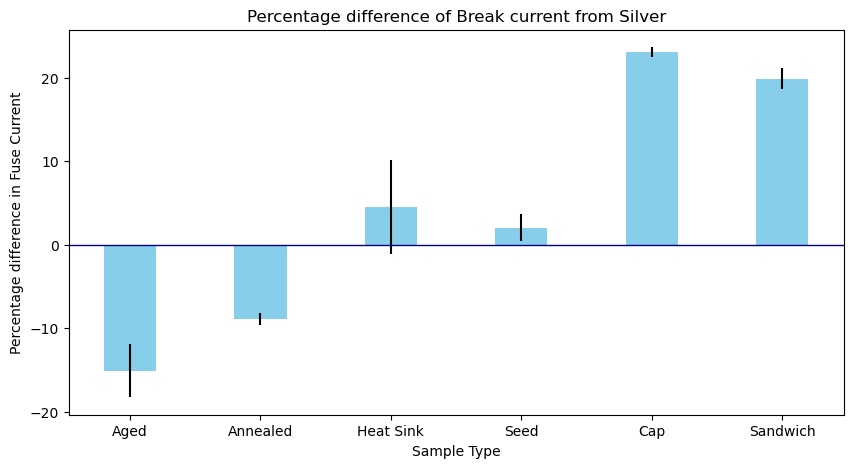

In [104]:
data = {'Aged':percentage_increase(np.mean(aged_fuse_I)) ,'Annealed': percentage_increase(np.mean(annealed_fuse_I)) ,'Heat Sink': percentage_increase(np.mean(heat_sink_fuse_I)),'Seed':percentage_increase(np.mean(al_seed_fuse_I)), 'Cap': percentage_increase(np.mean(al_cap_fuse_I)), 
        'Sandwich':percentage_increase(np.mean(al_sandwich_fuse_I))}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
#plt.bar(courses, values, color ='skyblue', 
#        width = 0.4)
plt.bar(courses, values, yerr=list_fuse_stds, color ='skyblue', 
        width = 0.4)
plt.axhline(y=0,linewidth=1, color='navy')
 

plt.xlabel("Sample Type")
plt.ylabel("Percentage difference in Fuse Current")
plt.title("Percentage difference of Break current from Silver")
plt.show()

## 1.2 - Slow break current - on and off

In [10]:
silver_slow_I = [740.3,765.8,868.6,747.7,739.9]
heat_sink_slow_I = [883.8,873.9]

al_seed_slow_I = [898.1,963.5,980,819.6,754.7]
al_cap_slow_I = [988.6,1058.1,883.4,933.5]
al_sandwich_slow_I = [950,887.1]

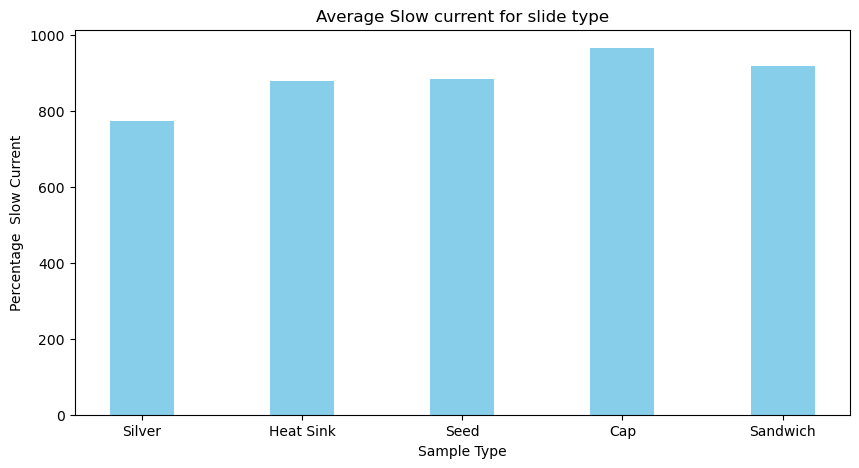

In [11]:
data = {'Silver':np.mean(silver_slow_I),'Heat Sink': np.mean(heat_sink_slow_I),'Seed':np.mean(al_seed_slow_I), 'Cap':np.mean(al_cap_slow_I), 
        'Sandwich':np.mean(al_sandwich_slow_I)}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='skyblue', 
        width = 0.4)
 
plt.xlabel("Sample Type")
plt.ylabel("Percentage  Slow Current")
plt.title("Average Slow current for slide type")
plt.show()

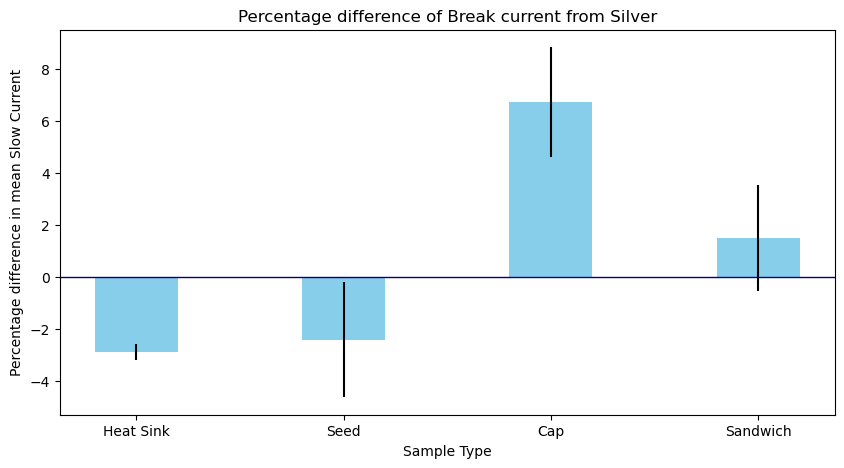

In [105]:
data = {'Heat Sink': percentage_increase(np.mean(heat_sink_slow_I)),'Seed':percentage_increase(np.mean(al_seed_slow_I)), 'Cap': percentage_increase(np.mean(al_cap_slow_I)), 
        'Sandwich':percentage_increase(np.mean(al_sandwich_slow_I))}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, yerr=list_slow_stds,color ='skyblue', 
        width = 0.4)
plt.axhline(y=0,linewidth=1, color='navy')
 

plt.xlabel("Sample Type")
plt.ylabel("Percentage difference in mean Slow Current")
plt.title("Percentage difference of Break current from Silver")
plt.show()

In [13]:
### Compare slow and fuse

In [14]:
list_fuses = [aged_fuse_I,annealed_fuse_I,heat_sink_fuse_I,al_seed_fuse_I,al_cap_fuse_I,al_sandwich_fuse_I]
list_slows = [heat_sink_slow_I,al_seed_slow_I,al_cap_slow_I,al_sandwich_slow_I]

In [15]:
list_fuse_inc = []
list_fuse_stds = []

for i in list_fuses:

    mean = np.mean(i)
    std = np.std(i)/len(i)
    error = error_prop_percentage(np.mean(silver_fuse_I),mean,np.std(silver_fuse_I),std)

    increase = percentage_increase(mean)
    list_fuse_inc.append(increase)
    list_fuse_stds.append(error)
#print(list_fuse_inc)

In [16]:
list_slow_inc = []
list_slow_stds = []

for i in list_slows:

    mean = np.mean(i)
    std = np.std(i)/len(i)

    error = error_prop_percentage(np.mean(silver_slow_I),mean,np.std(silver_slow_I)/len(silver_slow_I),std)
    increase = percentage_increase(mean)
    list_slow_inc.append(increase)
    list_slow_stds.append(error)
#print(list_slow_inc)

In [18]:
slide_type = ['Aged','Annealed','Heat Sink', 'Seed', 'Cap', 'Sandwich']
df = pd.DataFrame(list(zip([0,0]+list_slow_inc,list_fuse_inc)), columns=['Slow Break','Fuse Break'],index=slide_type)
df

,Slow Break,Fuse Break
Aged,0.000000,-15.070991
Annealed,0.000000,-8.850340
Heat Sink,-2.894868,4.552235
Seed,-2.416441,2.031932
Cap,6.723385,23.073863
Sandwich,1.491630,19.866306


In [19]:
df_err =pd.DataFrame(list(zip([0,0]+list_slow_stds,list_fuse_stds)), columns=['Slow Break','Fuse Break'], index=slide_type)

errorss = df_err[['Slow Break','Fuse Break']].T.values

In [20]:
list_fuse_stds

[3.180456906633894,
 0.7099466960212957,
 5.633204853043958,
 1.6043484329308684,
 0.5844979520054325,
 1.2567398243424974]

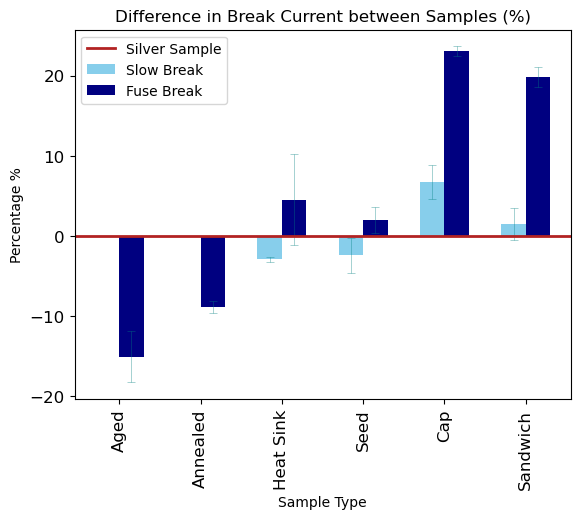

In [21]:
colours = ['skyblue','navy']
#errorss = 

ax = df.plot(kind='bar',color=colours,yerr=errorss,error_kw=dict(ecolor='teal',alpha=0.5, lw=0.5, capsize=3, capthick=0.5),width=0.6,title='Difference in Break Current between Samples (%)',xlabel='Sample Type',ylabel='Percentage %',fontsize=12)
ax.axhline(y=0,linewidth=2,color='firebrick',label='Silver Sample')

plt.legend()
plt.savefig("break_current_bar.svg",bbox_inches = 'tight')

So looks like the percentage difference in break current for slow break isn't mad which kinda makes sense. Better measure might be of how much current changes during run? Gonna try get measure for slope!

## Section 2 - Quick time vs temp plots

In [22]:
silver_slow_index = [3363,9145,5039,8360,43050]
silver_slow_temp = [87.62,93.56,77.5,69.96]

heat_sink_slow_index = [1286,14849]
heat_sink_slow_temp = [87.87,83.25]

al_seed_slow_index = [4407,651,191,828,14678]
al_seed_slow_temp = [97.94,107.56,81.94,103,106]

al_cap_slow_index = [10972,91372,12995,112654]
al_cap_slow_temp = [127.94,127.94,100.35,108.46]

al_sandwich_slow_index = [20427,91500]
al_sandwich_slow_temp =[106.12,112.69]

In [23]:
indices = silver_slow_index+heat_sink_slow_index+al_seed_slow_index+al_cap_slow_index+al_sandwich_slow_index
temps = silver_slow_temp+heat_sink_slow_temp+al_seed_slow_temp+al_cap_slow_temp+al_sandwich_slow_temp
currents = silver_slow_I+heat_sink_slow_I+al_seed_slow_I+al_cap_slow_I+al_sandwich_slow_I

In [25]:
## get mean time lasted

In [26]:
list_indices=[heat_sink_slow_index,al_seed_slow_index,al_cap_slow_index,al_sandwich_slow_index]
list_temps = [silver_slow_temp,heat_sink_slow_temp,al_seed_slow_temp,al_cap_slow_temp,al_sandwich_slow_temp]
list_currents = [silver_slow_I,heat_sink_slow_I,al_seed_slow_I,al_cap_slow_I,al_sandwich_slow_I]#

In [27]:
def percentage_increase_index(new_mean):
    avg_silver = np.mean(silver_slow_index)
    
    per_diff = (new_mean-avg_silver)/(avg_silver)*100
    return (per_diff)

In [30]:
list_slow__index_inc = []
list_slow_index_stds = []

for i in list_indices:

    mean = np.mean(i)
    std = np.std(i)/len(i)

    error = error_prop_percentage(np.mean(silver_slow_index),mean,np.std(silver_slow_index)/len(silver_slow_index),std)
    increase = percentage_increase_index(mean)
    list_slow__index_inc.append(increase)
    list_slow_index_stds.append(error)

In [31]:
slide_type = ['Heat Sink', 'Seed', 'Cap', 'Sandwich']
df_index = pd.DataFrame(list_slow__index_inc, columns=['Slow Break'], index=slide_type)

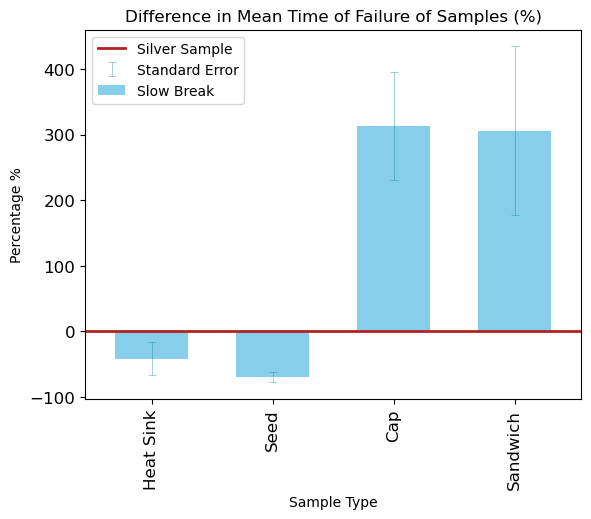

In [33]:
df_index.plot(kind='bar',color=['skyblue'],yerr=list_slow_index_stds,error_kw=dict(ecolor='teal',alpha=0.5, lw=0.5, capsize=3, capthick=0.5,label='Standard Error'),width=0.6,title='Difference in Mean Time of Failure of Samples (%)',xlabel='Sample Type',ylabel='Percentage %',fontsize=12,legend=True)
plt.axhline(y=0,linewidth=2,color='firebrick',label='Silver Sample')

plt.legend()
plt.savefig("ttf_bar2.svg",bbox_inches = 'tight')

In [34]:
mean_slow_currents = []
std_slow_currents = []

for i in list_currents:

    mean = np.mean(i)
    std = np.std(i)/len(i)
    mean_slow_currents.append(mean)
    std_slow_currents.append(std)

In [35]:
mean_slow_temps = []
std_slow_temps = []

for i in list_temps:

    mean = np.mean(i)
    std = np.std(i)/len(i)
    mean_slow_temps.append(mean)
    std_slow_temps.append(std)

In [36]:
list_fuse_currents = [silver_fuse_I,aged_fuse_I,annealed_fuse_I,al_seed_fuse_I,al_cap_fuse_I,al_sandwich_fuse_I]
list_fuse_temps = [silver_fuse_temp,aged_fuse_temp,annealed_fuse_temp,al_seed_fuse_temp,al_cap_fuse_temp,al_sandwich_fuse_temp]

In [37]:
mean_fuse_currents = []
std_fuse_currents = []

for i in list_fuse_currents:

    mean = np.mean(i)
    std = np.std(i)/len(i)
    mean_fuse_currents.append(mean)
    std_fuse_currents.append(std)

In [38]:
mean_fuse_temps = []
std_fuse_temps = []

for i in list_fuse_temps:

    mean = np.mean(i)
    std = np.std(i)/len(i)
    mean_fuse_temps.append(mean)
    std_fuse_temps.append(std)

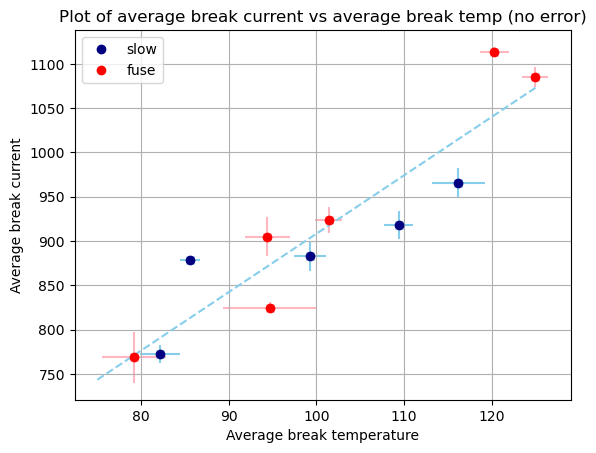

In [39]:
plt.plot(mean_slow_temps,mean_slow_currents,'o',color='navy',zorder=5,label='slow')
plt.plot(mean_fuse_temps,mean_fuse_currents,'o',color='red',zorder=5,label='fuse')
plt.errorbar(mean_slow_temps,mean_slow_currents,yerr=std_slow_currents,xerr=std_slow_temps,fmt='x',color='skyblue',zorder=0)
plt.errorbar(mean_fuse_temps,mean_fuse_currents,yerr=std_fuse_currents,xerr=std_fuse_temps,fmt='x',color='lightpink',zorder=0)

m,b = np.polyfit(mean_fuse_temps+mean_slow_temps,mean_fuse_currents+mean_slow_currents,1)
x = np.linspace(75,125,100)

plt.plot(x,m*x+b,'--',color='skyblue')
plt.title('Plot of average break current vs average break temp (no error)')
plt.xlabel('Average break temperature')
plt.ylabel('Average break current')
plt.legend()
plt.grid()

### 1.3- Investigate current decrease in slow break

In [40]:
def clean_data(data):
    cleaned_data = []

    for i in np.arange(0,len(data)-2,1):
    
        if np.abs(data[i]-data[i+1])< 50:
            cleaned_data.append(data[i])
    return cleaned_data

In [41]:
def find_kill_current(data):
    kill_currents = []
    current_index = []

    for i in np.arange(0,len(data)-2,1):

        current = data[i]
        next_current = data[i+1]

        if next_current < current-50:
            kill_currents.append(current)
            current_index.append(i)

    return current_index

In [42]:
def find_slope(input_directory):
    check_slopes= []
    current_drift = []
    check_b = []
    b_guess = []

    cleaned_data = clean_data(input_directory[:,1])
    end_range = find_kill_current(cleaned_data)
    ranges = np.arange(0,end_range[0]-100,100)

    for i in ranges:
        if cleaned_data[i]>100:
            try:
                x = np.arange(i,i+100,1)
                m1,b1 = np.polyfit(x,cleaned_data[i:i+100],1)
                    
                #plt.plot(cleaned_data,'o',color='pink')
                #plt.plot(x,m1*x+b1,color='navy')

                check_b.append(b1)
                check_slopes.append(m1)
            except:
                print('Index out of range')

    for n in np.arange(0,len(check_slopes)-1,1):
        difference = np.abs(check_slopes[n])-np.abs(check_slopes[n+1])

        if difference < 0.05*np.std(check_slopes):
            current_drift.append(check_slopes[n])
            b_guess.append(check_b[n])

    mean = np.mean(current_drift)
    std = np.std(current_drift)
    b = np.mean(b_guess)
    #print(check_slopes)
    #print(current_drift)

    return mean,std, b


In [43]:
directory = r"C:\Users\bethx\OneDrive\Documents\Final_Year_Modules\Thesis"

## silver slow runs
run_1_22_03 = np.loadtxt(directory+r"\Arduino_temp_current_sensor\22_03\const_current_1A\merged_ const_current_1A.txt",delimiter=',')
run_5_22_03 = np.loadtxt(directory+r"\Arduino_temp_current_sensor\22_03\slow_break_on_axis.507\slow_break_on_axis.txt",delimiter=',')
run_ag_slow= np.loadtxt(directory+r"\Arduino_temp_current_sensor\02_04\Ag_slow_on\Ag_slow_on.txt",delimiter=',',skiprows=2)
run_1_25_03 = np.loadtxt(directory+r"\Arduino_temp_current_sensor\25_03\slow_break_off_axis_0.507\slow_break_off_axis_0.507.txt",delimiter=',',skiprows=2)
run_2_25_03 = np.loadtxt(directory+r"\Arduino_temp_current_sensor\25_03\slow_break_off_axis_0.507_1A\slow_break_off_axis_0.507_1A.txt",delimiter=',',skiprows=2)

list_silver_runs = [run_1_22_03,run_5_22_03,run_ag_slow,run_1_25_03,run_2_25_03]

In [44]:
current_drop_silver_means = []
current_drop_silver_stds = []

for i in list_silver_runs:

    m,sd,b = find_slope(i)
    current_drop_silver_means.append(m)
    current_drop_silver_stds.append(sd)

In [45]:
## Al seed slow runs
run_Al_seed_1 = np.loadtxt(directory+r"\Arduino_temp_current_sensor\26_03\Al_3_slow_1A\Al_3_slow_1A.txt",delimiter=',',skiprows=2)
Al_seed_4 = np.loadtxt(directory+r"\Arduino_temp_current_sensor\10_04\Al_seed_on_slow\Al_seed_on_slow.txt",delimiter=',')   
Al_seed_3 = np.loadtxt(directory+r"\Arduino_temp_current_sensor\10_04\Al_seed_off_slow\Al_seed_off_slow.txt",delimiter=',')   
Al_seed_off_slow = np.loadtxt(directory+r"\Arduino_temp_current_sensor\12_04\Al_seed_off_slow\Al_seed_off_slow.txt",delimiter=',')   
Al_seed_on_slow = np.loadtxt(directory+r"\Arduino_temp_current_sensor\12_04\Al_seed_on_slow\Al_seed_on_slow.txt",delimiter=',')   

## Al cap slow runs
run_Al_cap_2= np.loadtxt(directory+r"\Arduino_temp_current_sensor\27_03\Al_cap_2_on_slow\Al_cap_2_on_slow.txt",delimiter=',',skiprows=2)
run_Al_cap_4= np.loadtxt(directory+r"\Arduino_temp_current_sensor\28_03\Al_cap_4_off_slow\Al_cap_4_off_slow.txt",delimiter=',',skiprows=2)
Al_cap_3 = np.loadtxt(directory+r"\Arduino_temp_current_sensor\09_04\Al_cap_off_slow\Al_cap_off_slow.txt",delimiter=',')   
run_al_cap_2_slow= np.loadtxt(directory+r"\Arduino_temp_current_sensor\04_04\Al_cap_2_slow_\Al_cap_2_slow_.txt",delimiter=',',skiprows=2)

## Al sandwich slow runs
Al_sandwich_morning = np.loadtxt(directory+r"\Arduino_temp_current_sensor\10_04\Al_sandwich_on_slow_morning_after\Al_sandwich_on_slow_morning_after.txt",delimiter=',')  
sandwich_slow_off= np.loadtxt(directory+r"\Arduino_temp_current_sensor\12_04\sandwich_slow_off\sandwich_slow_off.txt",delimiter=',')   

## Heat sink slow runs
heat_sink_3 = np.loadtxt(directory+r"\Arduino_temp_current_sensor\11_04\silver_heat_sink_off_slow\silver_heat_sink_off_slow.txt",delimiter=',')  
heat_sink_4 = np.loadtxt(directory+r"\Arduino_temp_current_sensor\12_04\silver_heat_sink_on_slow\silver_heat_sink_on_slow.txt",delimiter=',')  

## Lists
list_al_seed_runs = [run_Al_seed_1,Al_seed_4,Al_seed_off_slow,Al_seed_on_slow]
list_al_sand_runs = [Al_sandwich_morning,sandwich_slow_off]
list_al_cap_runs = [run_Al_cap_4,run_Al_cap_2,Al_cap_3,run_al_cap_2_slow]
list_heat_sink_runs = [heat_sink_4,heat_sink_3]

In [46]:
current_drop_al_cap_means = []
current_drop_al_cap_stds = []

for i in list_al_cap_runs:

    m,sd,b = find_slope(i)
    current_drop_al_cap_means.append(m)
    current_drop_al_cap_stds.append(sd)

In [47]:
current_drop_al_seed_means = []
current_drop_al_seed_stds = []

for i in list_al_seed_runs:

    m,sd,b = find_slope(i)
    current_drop_al_seed_means.append(m)
    current_drop_al_seed_stds.append(sd)

In [48]:
current_drop_al_sand_means = []
current_drop_al_sand_stds = []

for i in list_al_sand_runs:

    m,sd,b = find_slope(i)
    current_drop_al_sand_means.append(m)
    current_drop_al_sand_stds.append(sd)

In [49]:
current_drop_hs_means = []
current_drop_hs_stds = []

for i in list_heat_sink_runs:

    m,sd,b = find_slope(i)
    current_drop_hs_means.append(m)
    current_drop_hs_stds.append(sd)

In [50]:
list_current_drops = [current_drop_hs_means,current_drop_al_seed_means,current_drop_al_sand_means,current_drop_al_cap_means]

In [51]:
mean_drops = []

for i in list_current_drops:
    mean = np.mean(i)
    mean_drops.append(mean)

In [53]:
def percentage_diff_current_drop(new_mean):
    avg_silver = np.mean(current_drop_silver_means)
    
    per_diff = (new_mean-avg_silver)/(avg_silver)*100
    return (per_diff)

In [54]:
list_current_change = []
cc_std= []

for i in list_current_drops:

    mean = np.mean(i)
    std = np.std(i)/len(i)

    error = error_prop_percentage(np.mean(current_drop_silver_means),mean,np.std(current_drop_silver_means)/len(current_drop_silver_means),std)
    increase = percentage_diff_current_drop(mean)
    list_current_change.append(increase)
    cc_std.append(error)

In [55]:
slide_type = ['Heat Sink','Seed', 'Cap', 'Sandwich']
df_I_drop = pd.DataFrame(list_current_change, columns=['Slow Break'], index=slide_type)

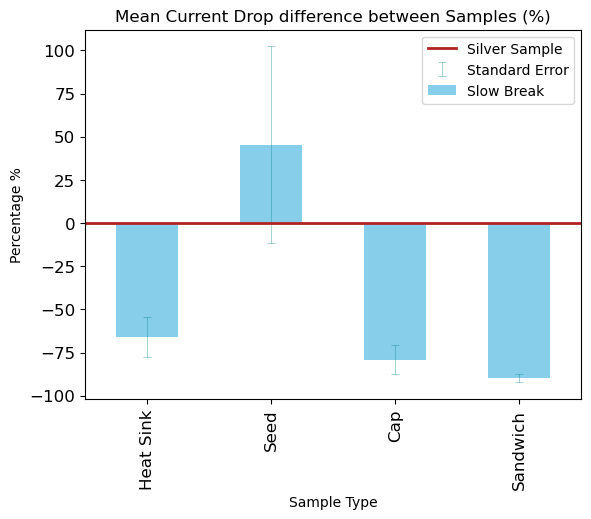

In [56]:
df_I_drop.plot(kind='bar',color=['skyblue'],yerr=cc_std,error_kw=dict(ecolor='teal',alpha=0.5, lw=0.5, capsize=3, capthick=0.5,label='Standard Error'),title='Mean Current Drop difference between Samples (%)',ylabel='Percentage %',xlabel='Sample Type',fontsize=12)
plt.axhline(y=0,linewidth=2,color='firebrick',label='Silver Sample')
plt.legend()
plt.savefig("current_drop_bar.svg",bbox_inches = 'tight')

In [59]:
## compare al cap and no cap fuse break

run_Al_cap_fuse = np.loadtxt(directory+r"\Arduino_temp_current_sensor\26_03\Al_1_fuse_break_0.51\Al_1_fuse_break_0.51.txt",delimiter=',',skiprows=2)
run_4_22_03 = np.loadtxt(directory+r"\Arduino_temp_current_sensor\22_03\off_axis_thick_0.507\fuse_break_off_axis_2.txt",delimiter=',')
Al_on_cap_2 = np.loadtxt(directory+r"\Arduino_temp_current_sensor\09_04\Al_cap_on_2_fuse\Al_fuse_on_2.txt",delimiter=',')   ## r=10

Al_seed_1 = np.loadtxt(directory+r"\Arduino_temp_current_sensor\10_04\Al_seed_on_fuse\Al_seed_on_fuse.txt",delimiter=',')   ## r=10
Al_sandwich_3 = np.loadtxt(directory+r"\Arduino_temp_current_sensor\11_04\Al_sandwich_oN_fuse\Al_sandwich_on_fuse.txt",delimiter=',')   ## r=11

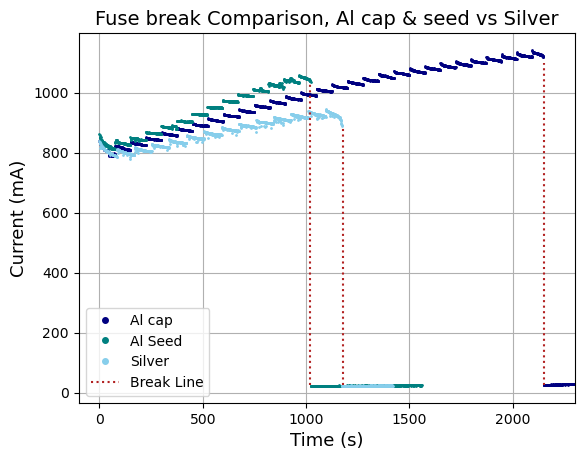

In [60]:
plt.plot(clean_data(Al_on_cap_2[:,1]),'o',markersize=1,color='navy',label='Al cap')
plt.vlines(x = 2150,ymin =25, ymax = 1100,ls=':',color = 'firebrick')
plt.plot(clean_data(Al_seed_1[:,1]),'o',markersize=1,color='teal',label='Al Seed')
plt.plot(clean_data(run_4_22_03[:,1]),'o',markersize=1,color='skyblue',label='Silver')
plt.vlines(x = 1180,ymin =25, ymax = 890,ls=':',color = 'firebrick')
plt.vlines(x = 1020,ymin =25, ymax = 1030,ls=':',color = 'firebrick',label='Break Line')

#plt.plot(clean_data(Al_sandwich_3[:,1]),'o',markersize=3,color='lightgreen',label='sandwich')

plt.title('Fuse break Comparison, Al cap & seed vs Silver',fontsize=14)
plt.ylabel('Current (mA)',fontsize=13)
plt.xlabel('Time (s)',fontsize=13)
plt.xlim(-100,2300)
plt.grid()
plt.legend(loc=3,markerscale=4)
plt.savefig('comparison_fuse.png',dpi=300)

In [61]:
run_3_22_03 = np.loadtxt(directory+r"\Arduino_temp_current_sensor\22_03\on_axis_fuse\fuse_break_on_axis_.txt",delimiter=',')

df_fuse = pd.DataFrame(list(zip(clean_data(run_3_22_03[:,1]),run_3_22_03[:,2],run_3_22_03[:,3])),columns=['Fuse Currents','Temps','Env'])

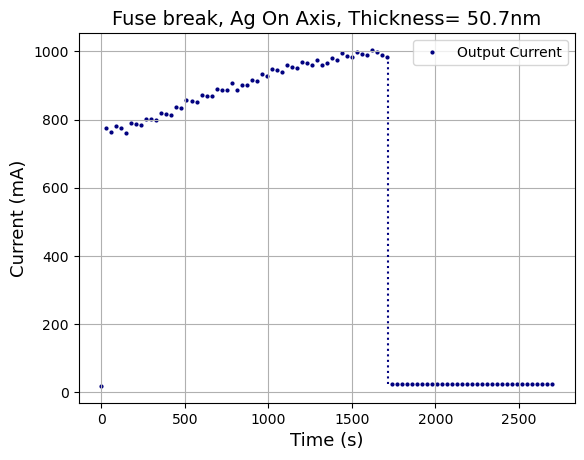

In [110]:
plt.plot(np.arange(0,2705,30),run_3_22_03[:,1][::30],'o',markersize=2,color='navy',zorder=1,label='Output Current')
plt.vlines(x = 1718,ymin =25, ymax = 980,ls=':',color = 'navy')
#plt.plot(run_3_22_03[:,1],'o',markersize=2,alpha=0.5,color='skyblue',zorder=0,label='Output Current')



#plt.errorbar(np.arange(0,2705,30),run_3_22_03[:,1][::30],yerr=list_stds,color='skyblue',fmt='o',zorder=0,label='Error Bars')
#plt.errorbar(index2,df_fuse['Fuse Currents'][1719:].rolling(window=50).mean(),yerr=err2,alpha=0.2,color='skyblue',fmt='o',zorder=0)

plt.title('Fuse break, Ag On Axis, Thickness= 50.7nm',fontsize=14)
plt.ylabel('Current (mA)',fontsize=13)
plt.xlabel('Time (s)',fontsize=13)
plt.grid()
plt.legend()

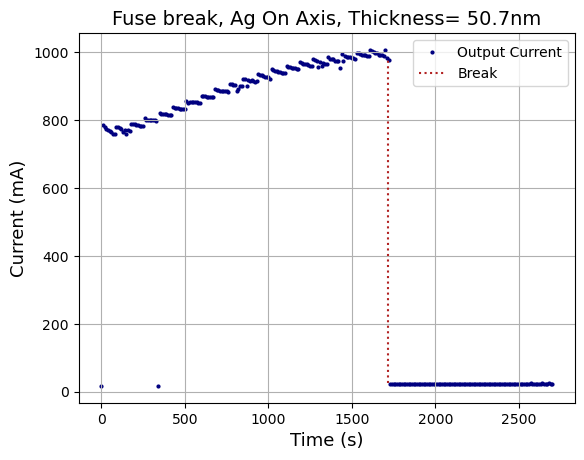

In [64]:
plt.plot(np.arange(0,2705,10),run_3_22_03[:,1][::10],'o',markersize=2,color='navy',zorder=1,label='Output Current')
plt.vlines(x = 1718,ymin =25, ymax = 980,ls=':',color = 'firebrick',label='Break')


plt.title('Fuse break, Ag On Axis, Thickness= 50.7nm',fontsize=14)
plt.ylabel('Current (mA)',fontsize=13)
plt.xlabel('Time (s)',fontsize=13)
plt.grid()
plt.legend()

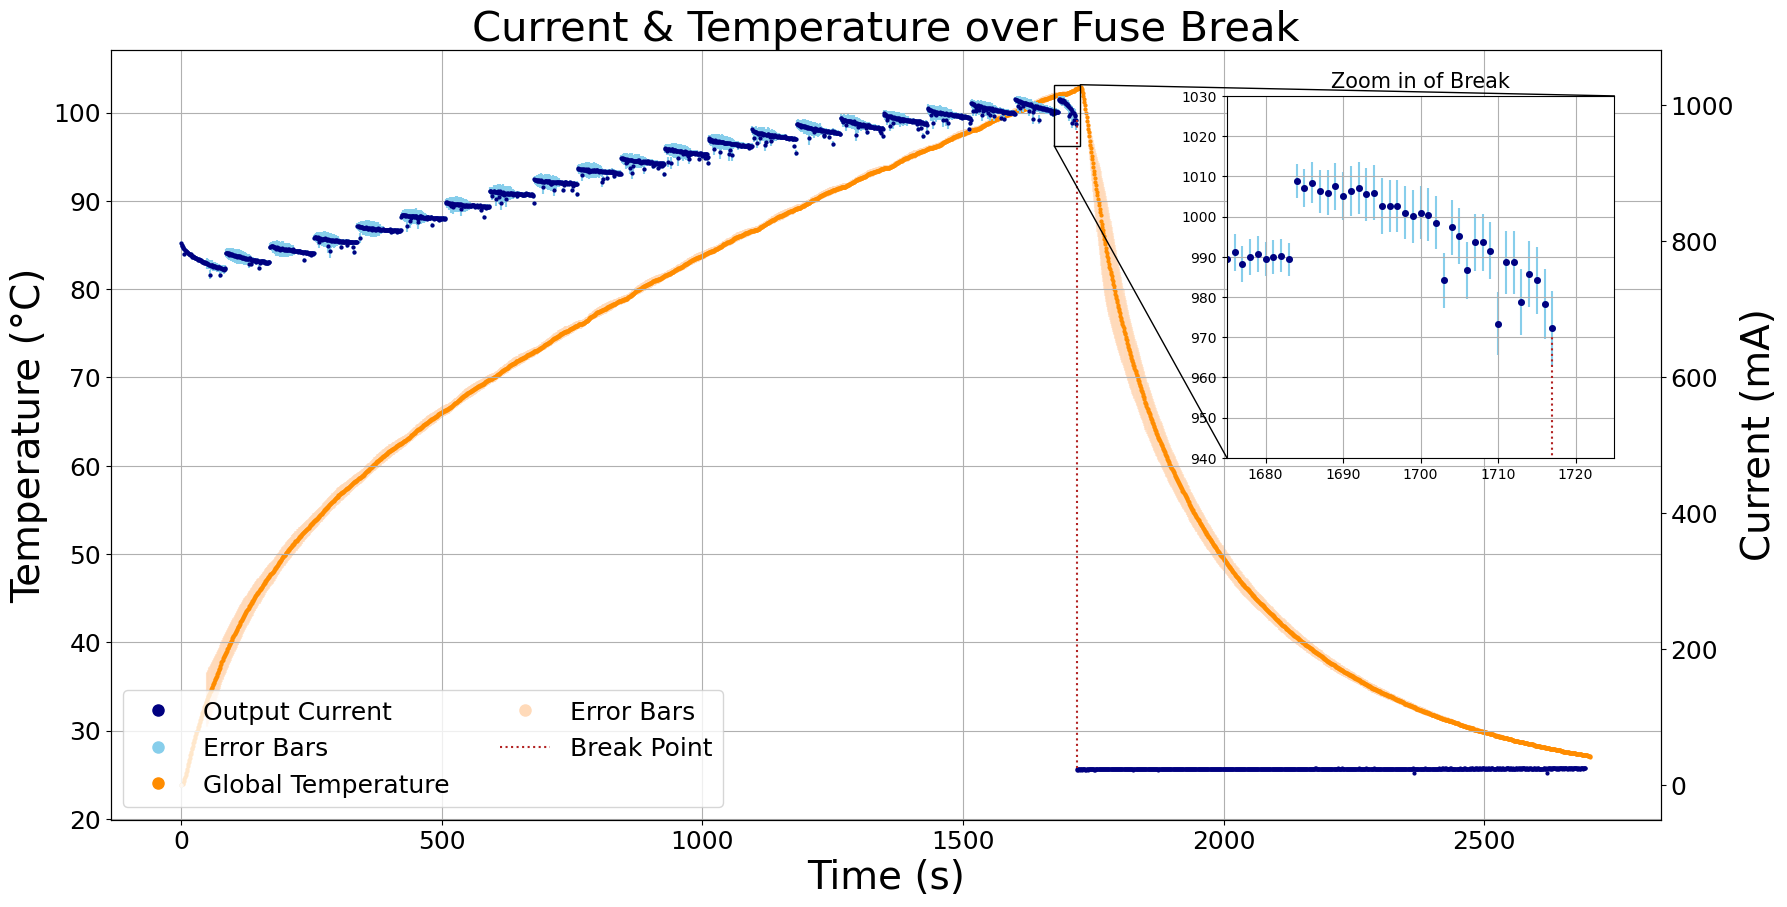

In [103]:
fig, ax1 = plt.subplots(figsize=(20, 10))
ax2 = ax1.twinx()

index1 = np.arange(0,1718,1)
err1 = df_fuse['Fuse Currents'][0:1718].rolling(window=50).std()

lns1=ax2.plot(np.arange(0,2695,1),clean_data(run_3_22_03[:,1]),'o',markersize=2,zorder=1,color='navy',label='Output Current')
lns4 = ax2.errorbar(index1,df_fuse['Fuse Currents'][0:1718],yerr=err1,markersize=2,color='skyblue',fmt='o',zorder=0,label='Error Bars')

errt = df_fuse['Temps'].rolling(window=50).std()
indext = np.arange(0,len(df_fuse['Temps']),1)

lns3=ax1.plot(np.arange(0,2705,1),run_3_22_03[:,2],'o',markersize=2,zorder=1,color='darkorange',label='Global Temperature')
lns5 = ax1.errorbar(indext,df_fuse['Temps'],yerr=errt,alpha=0.5,markersize=2,color='peachpuff',fmt='o',zorder=0,label='Error Bars')

ax1.grid(True)
ax1.set_xlabel("Time (s)",fontsize=28)
plt.title("Current & Temperature over Fuse Break" ,fontsize=30)
ax2.set_ylabel('Current (mA)',fontsize=28)#, color = color_sensor)
ax1.set_ylabel('Temperature (°C)',fontsize=28)

#ax2.plot(current,y, linewidth=3, color="#ff7f0e")
for label in ax1.xaxis.get_majorticklabels():
        label.set_fontsize(18)
for label in ax2.yaxis.get_majorticklabels():
        label.set_fontsize(18)
for label in ax1.yaxis.get_majorticklabels():
        label.set_fontsize(18)

lns2 = ax2.plot(1718, 980,ls=':',color = 'firebrick',label='Break Point')
lns4 = ax2.plot(0, 0,'o',markersize=2,color = 'skyblue',label='Error Bars')
lns5 = ax2.plot(0, 0,'o',markersize=2,color = 'peachpuff',label='Error Bars')


lns = lns1+lns4+lns3+lns5+lns2
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, ncol=2,loc=3,markerscale=4,fontsize=18) 
ax2.vlines(x = 1718,ymin =25, ymax = 980,ls=':',color = 'firebrick',label='Break')

x1, x2, y1, y2 = 1675, 1725, 940, 1030
  
axins = ax2.inset_axes([0.72, 0.47, 0.25, 0.47])
axins.plot(np.arange(0,2695,1),clean_data(run_3_22_03[:,1]),'o',markersize=4,color='navy')
axins.errorbar(index1,df_fuse['Fuse Currents'][0:1718],yerr=err1,markersize=4,color='skyblue',fmt='o',zorder=0,label='Error Bars')
axins.vlines(x = 1717,ymin =25, ymax = 970,ls=':',color = 'firebrick',label='Break')

axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_title('Zoom in of Break',fontsize=15)
axins.grid()
ax2.indicate_inset_zoom(axins,edgecolor='black',alpha=1)

#fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          #fancybox=True, shadow=True, ncol=3,markerscale=5,fontsize=20)

plt.savefig("Fuse_break_Ag.png",dpi=300,bbox_inches = 'tight')

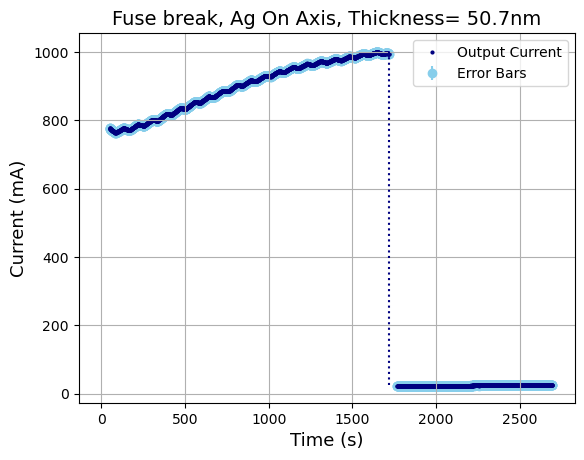

In [658]:
plt.plot(df_fuse['Fuse Currents'][0:1718].rolling(window=50).mean(),'o',markersize=2,color='navy',zorder=1,label='Output Current')
plt.plot(df_fuse['Fuse Currents'][1719:].rolling(window=50).mean(),'o',markersize=2,color='navy',zorder=1)
plt.vlines(x = 1718,ymin =25, ymax = 1000,ls=':',color = 'navy')

err1 = df_fuse['Fuse Currents'][0:1718].rolling(window=50).std()
err2 = df_fuse['Fuse Currents'][1719:].rolling(window=50).std()
index1 = np.arange(0,1718,1)
index2 = np.arange(1718,2694,1)

plt.errorbar(index1,df_fuse['Fuse Currents'][0:1718].rolling(window=50).mean(),yerr=err1,color='skyblue',fmt='o',zorder=0,label='Error Bars')
plt.errorbar(index2,df_fuse['Fuse Currents'][1719:].rolling(window=50).mean(),yerr=err2,color='skyblue',fmt='o',zorder=0)

plt.title('Fuse break, Ag On Axis, Thickness= 50.7nm',fontsize=14)
plt.ylabel('Current (mA)',fontsize=13)
plt.xlabel('Time (s)',fontsize=13)
plt.grid()
plt.legend()

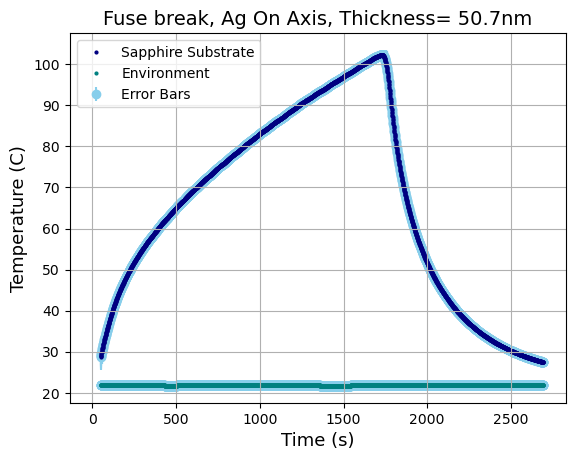

In [615]:
plt.plot(df_fuse['Temps'].rolling(window=50).mean(),'o',markersize=2,color='navy',zorder=1,label='Sapphire Substrate')
plt.plot(df_fuse['Env'].rolling(window=50).mean(),'o',markersize=2,color='teal',zorder=1,label='Environment')

err1 = df_fuse['Temps'].rolling(window=50).std()
err2 = df_fuse['Env'].rolling(window=50).std()
index1 = np.arange(0,len(df_fuse['Temps']),1)
index2 = np.arange(0,len(df_fuse['Env']),1)

plt.errorbar(index1,df_fuse['Temps'].rolling(window=50).mean(),yerr=err1,color='skyblue',fmt='o',zorder=0,label='Error Bars')
plt.errorbar(index2,df_fuse['Env'].rolling(window=50).mean(),yerr=err2,color='skyblue',fmt='o',zorder=0)

plt.title('Fuse break, Ag On Axis, Thickness= 50.7nm',fontsize=14)
plt.ylabel('Temperature (C)',fontsize=13)
plt.xlabel('Time (s)',fontsize=13)
plt.grid()
plt.legend()

In [90]:
df_slow = pd.DataFrame(list(zip(clean_data(run_5_22_03[:,1]),run_5_22_03[:,2],run_5_22_03[:,3])),columns=['Fuse Currents','Temps','Env'])
len(df_slow['Fuse Currents'])

70780

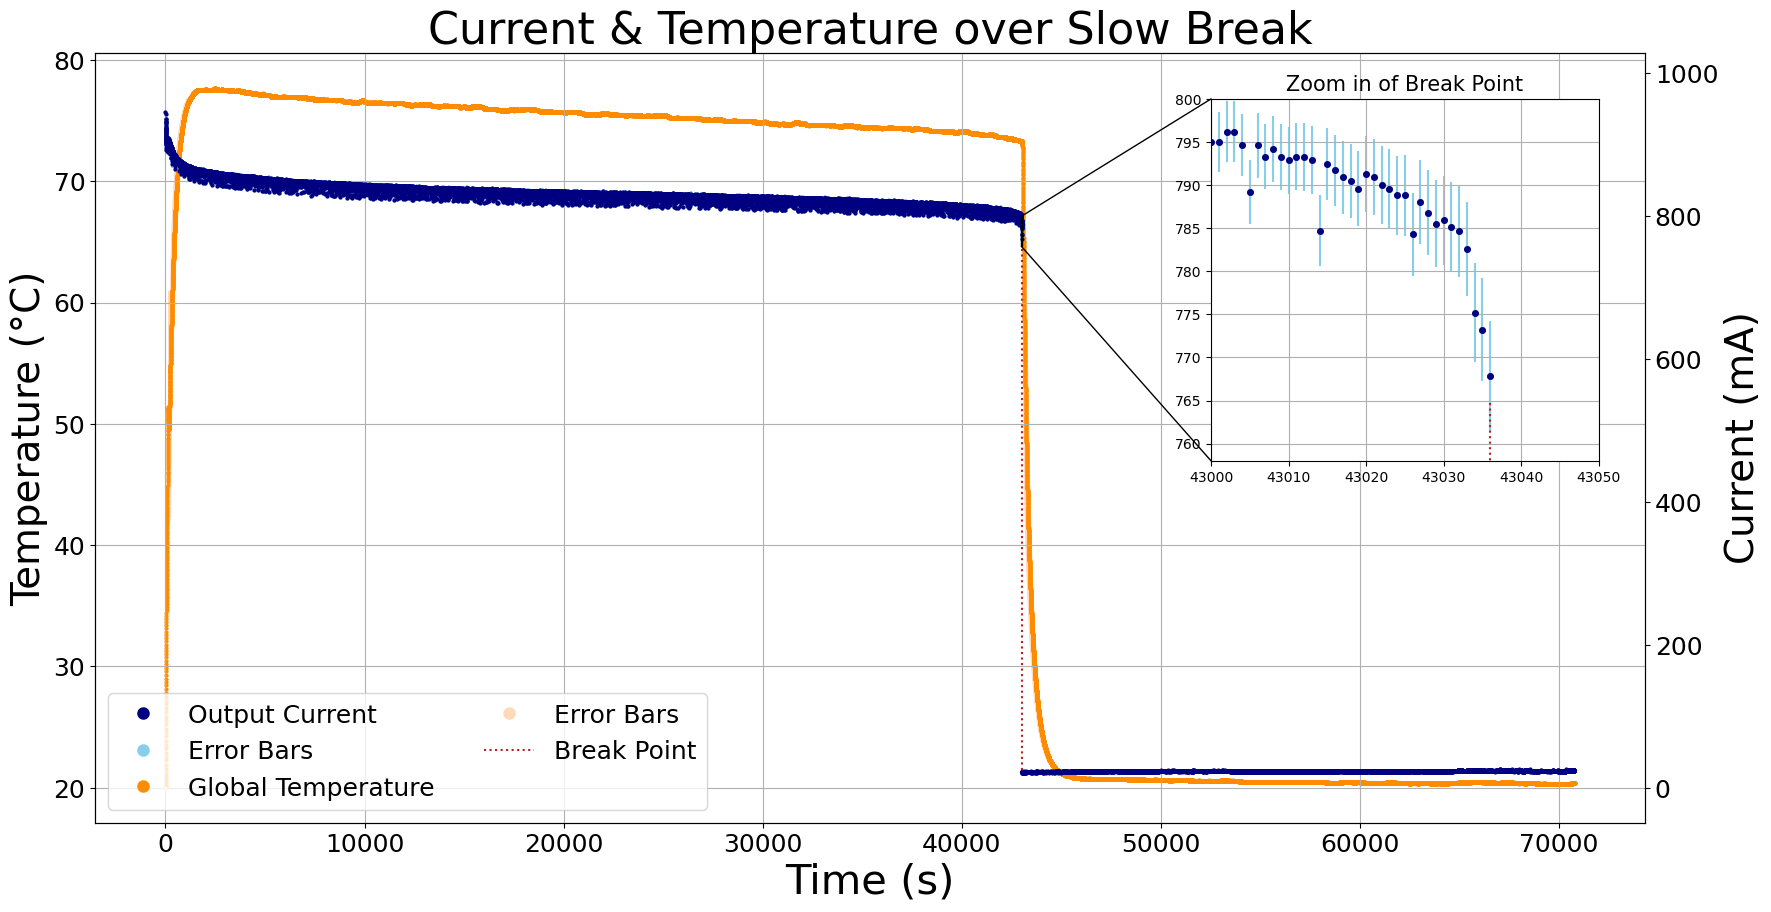

In [100]:
fig, ax1 = plt.subplots(figsize=(20, 10))
ax2 = ax1.twinx()

index1 = np.arange(0,43037,1)
err1 = df_slow['Fuse Currents'][0:43037].rolling(window=200).std()

lns1=ax2.plot(np.arange(0,70780,1),clean_data(run_5_22_03[:,1]),'o',markersize=2,zorder=1,color='navy',label='Output Current')
lns4 = ax2.errorbar(index1,df_slow['Fuse Currents'][0:43037],yerr=err1,markersize=2,color='skyblue',fmt='o',zorder=0,label='Error Bars')

errt = df_slow['Temps'].rolling(window=200).std()
indext = np.arange(0,len(df_slow['Temps']),1)

lns3=ax1.plot(np.arange(0,70796,1),run_5_22_03[:,2],'o',markersize=2,zorder=1,color='darkorange',label='Global Temperature')
lns5 = ax1.errorbar(indext,df_slow['Temps'],yerr=errt,alpha=0.5,markersize=2,color='peachpuff',fmt='o',zorder=0,label='Error Bars')

ax1.grid(True)
ax1.set_xlabel("Time (s)",fontsize=30)
plt.title("Current & Temperature over Slow Break" ,fontsize=32)
ax2.set_ylabel('Current (mA)',fontsize=28)#, color = color_sensor)
ax1.set_ylabel('Temperature (°C)',fontsize=28)
ax2.vlines(x = 43036,ymin =25, ymax = 765,ls=':',color = 'firebrick',label='Break')


#ax2.plot(current,y, linewidth=3, color="#ff7f0e")
for label in ax1.xaxis.get_majorticklabels():
        label.set_fontsize(18)
for label in ax2.yaxis.get_majorticklabels():
        label.set_fontsize(18)
for label in ax1.yaxis.get_majorticklabels():
        label.set_fontsize(18)


lns2 = ax2.plot(1718, 980,ls=':',color = 'firebrick',label='Break Point')
lns4 = ax2.plot(0, 0,'o',markersize=2,color = 'skyblue',label='Error Bars')
lns5 = ax2.plot(0, 0,'o',markersize=2,color = 'peachpuff',label='Error Bars')


lns = lns1+lns4+lns3+lns5+lns2
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, ncol=2,loc=3,markerscale=4,fontsize=18) 


x1, x2, y1, y2 = 43000, 43050, 758, 800
  
axins = ax2.inset_axes([0.72, 0.47, 0.25, 0.47])
axins.plot(np.arange(0,70780,1),clean_data(run_5_22_03[:,1]),'o',markersize=4,color='navy')
axins.errorbar(index1,df_slow['Fuse Currents'][0:43037],yerr=err1,markersize=4,color='skyblue',fmt='o',zorder=0,label='Error Bars')
axins.vlines(x = 43036,ymin =25, ymax = 765,ls=':',color = 'firebrick',label='Break')

axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_title('Zoom in of Break Point',fontsize=15)
axins.grid()
ax2.indicate_inset_zoom(axins,edgecolor='black',alpha=1)

plt.savefig("slow_break_Ag.png",dpi=300,bbox_inches = 'tight')

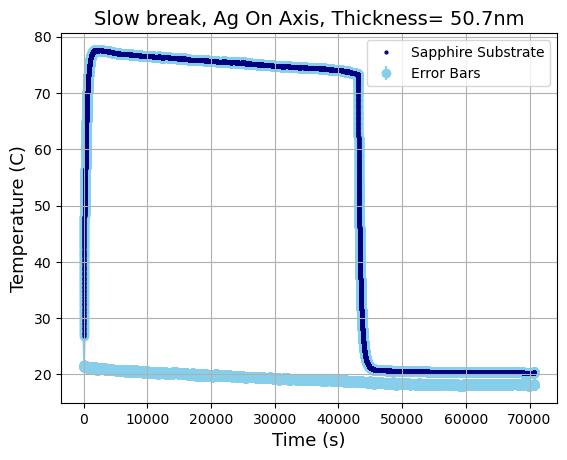

In [675]:
plt.plot(df_slow['Temps'].rolling(window=50).mean(),'o',markersize=2,color='navy',zorder=1,label='Sapphire Substrate')
plt.plot(df_slow['Env'].rolling(window=50).mean(),'o',markersize=2,color='teal',zorder=1,label='Enviornment')
#plt.plot(df_fuse['Fuse Currents'],'o',alpha=0.2,color='skyblue',zorder=0)



err1 = df_slow['Temps'].rolling(window=50).std()
err2 = df_slow['Env'].rolling(window=50).std()
index1 = np.arange(0,len(df_slow['Temps']),1)
index2 = np.arange(0,len(df_slow['Env']),1)

plt.errorbar(index1,df_slow['Temps'].rolling(window=50).mean(),yerr=err1,color='skyblue',fmt='o',zorder=0,label='Error Bars')
plt.errorbar(index2,df_slow['Env'].rolling(window=50).mean(),yerr=err2,color='skyblue',fmt='o',zorder=0)

plt.title('Slow break, Ag On Axis, Thickness= 50.7nm',fontsize=14)
plt.ylabel('Temperature (C)',fontsize=13)
plt.xlabel('Time (s)',fontsize=13)
plt.grid()
plt.legend()

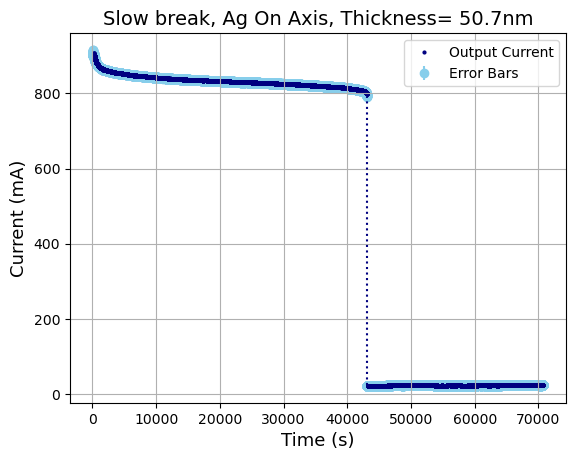

In [677]:
plt.plot(df_slow['Fuse Currents'][0:43037].rolling(window=200).mean(),'o',markersize=2,color='navy',zorder=1,label='Output Current')
plt.plot(df_slow['Fuse Currents'][43038:].rolling(window=200).mean(),'o',markersize=2,color='navy',zorder=1)
#plt.plot(df_fuse['Fuse Currents'],'o',alpha=0.2,color='skyblue',zorder=0)
plt.vlines(x = 43037,ymin =25, ymax = 790,ls=':',color = 'navy')


err1 = df_slow['Fuse Currents'][0:43037].rolling(window=200).std()
err2 = df_slow['Fuse Currents'][43038:].rolling(window=200).std()
index1 = np.arange(0,43037,1)
index2 = np.arange(43038,70780,1)

plt.errorbar(index1,df_slow['Fuse Currents'][0:43037].rolling(window=50).mean(),yerr=err1,color='skyblue',fmt='o',zorder=0,label='Error Bars')
plt.errorbar(index2,df_slow['Fuse Currents'][43038:].rolling(window=50).mean(),yerr=err2,color='skyblue',fmt='o',zorder=0)

plt.title('Slow break, Ag On Axis, Thickness= 50.7nm',fontsize=14)
plt.ylabel('Current (mA)',fontsize=13)
plt.xlabel('Time (s)',fontsize=13)
plt.grid()
plt.legend()

In [68]:
Al_cap_3 = np.loadtxt(directory+r"\Arduino_temp_current_sensor\09_04\Al_cap_off_slow\Al_cap_off_slow.txt",delimiter=',')   ## r=9

In [109]:
df_slow_Al = pd.DataFrame(list(zip(clean_data(Al_cap_3[:,1]),Al_cap_3[:,2])),columns=['Fuse Currents','Temps'])
#len(df_slow_Al['Fuse Currents'])

In [71]:
def clean_data1(data):
    cleaned_data = []

    for i in np.arange(0,len(data)-2,1):
    
        if np.abs(data[i]-data[i+1])< 20:
            cleaned_data.append(data[i])
    return cleaned_data

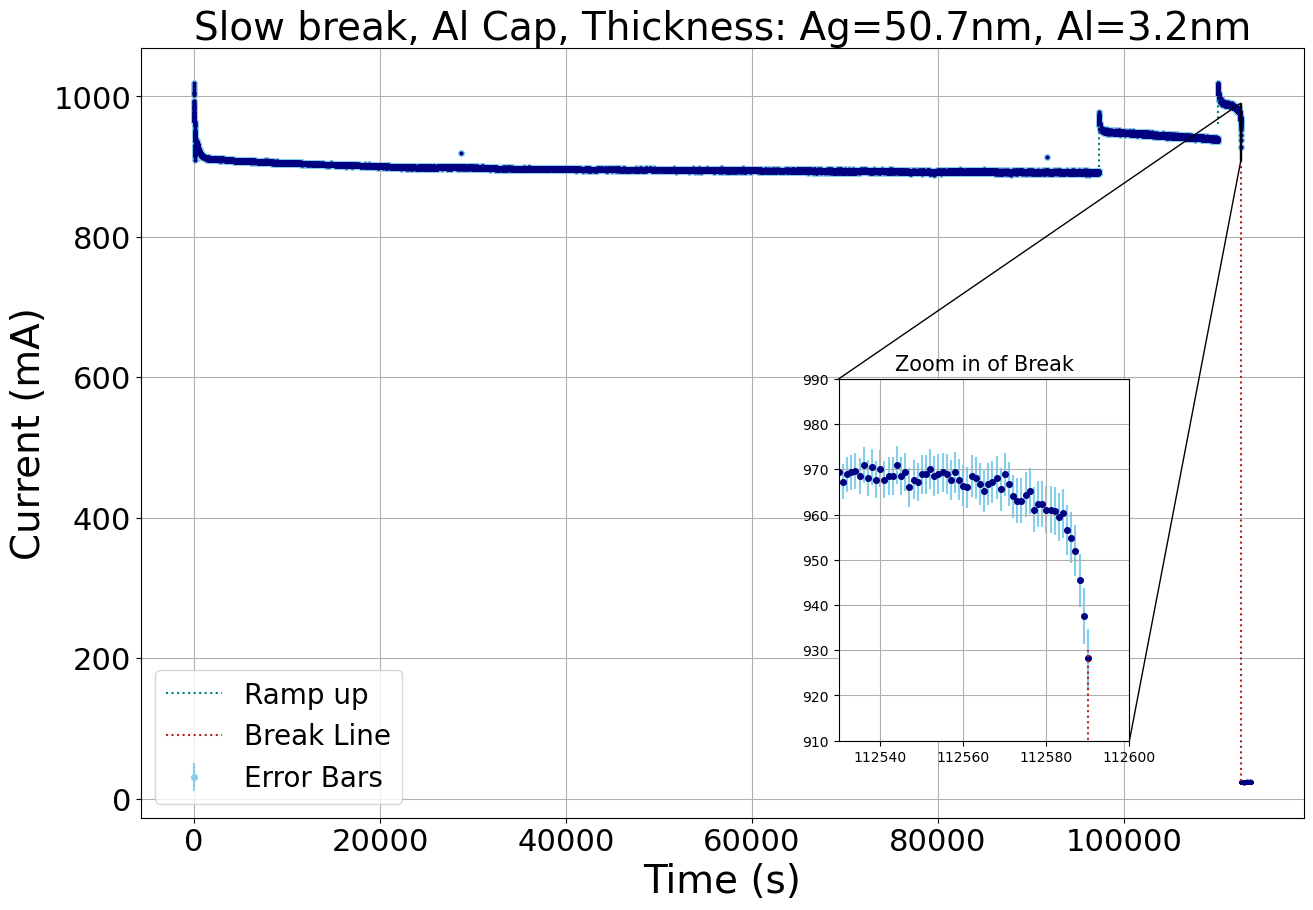

In [99]:
fig, ax1 = plt.subplots(figsize=(15, 10))


ax1.plot(clean_data(Al_cap_3[:,1]),'o',markersize=2,color='navy')

err1 = (df_slow_Al['Fuse Currents'][0:97287]).rolling(window=500).std()
err2 = df_slow_Al['Fuse Currents'][97287:110107].rolling(window=500).std()
err3 = df_slow_Al['Fuse Currents'][110107:112591].rolling(window=500).std()
#err4 = df_slow_Al['Fuse Currents'][112591:].rolling(window=500).std()

index1 = np.arange(0,97287,1)
index2 = np.arange(97287,110107,1)
index3 = np.arange(110107,112591,1)


ax1.errorbar(index1,df_slow_Al['Fuse Currents'][0:97287],yerr=err1,markersize=4,color='skyblue',fmt='o',zorder=0,label='Error Bars')
ax1.errorbar(index2,df_slow_Al['Fuse Currents'][97287:110107],yerr=err2,markersize=4,color='skyblue',fmt='o',zorder=0)
ax1.errorbar(index3,df_slow_Al['Fuse Currents'][110107:112591],yerr=err3,markersize=4,color='skyblue',fmt='o',zorder=0)

ax1.vlines(x = 97287,ymin =900, ymax = 960,ls=':',color = 'teal')
ax1.vlines(x = 110107,ymin =960, ymax = 1000,ls=':',color = 'teal',label='Ramp up')
ax1.vlines(x = 112591,ymin =25, ymax = 960,ls=':',color = 'firebrick',label='Break Line')
ax1.grid()
ax1.legend(fontsize=20)
x1, x2, y1, y2 = 112530, 112600, 910, 990
  
axins = ax1.inset_axes([0.6, 0.1, 0.25, 0.47])
axins.plot(clean_data(Al_cap_3[:,1])[0:112591],'o',markersize=4,color='navy')
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
#axins.errorbar(index1,df_slow['Fuse Currents'][0:43037],yerr=err1,markersize=4,color='skyblue',fmt='o',zorder=0,label='Error Bars')
axins.vlines(x = 112590,ymin =25, ymax = 930,ls=':',color = 'firebrick',label='Break Line')
axins.errorbar(index3,df_slow_Al['Fuse Currents'][110107:112591],yerr=err3,markersize=4,color='skyblue',fmt='o',zorder=0)


axins.set_title('Zoom in of Break',fontsize=15)
axins.grid()
ax1.indicate_inset_zoom(axins,edgecolor='black',alpha=1)

ax1.xaxis.get_major_ticks()
ax1.tick_params(axis='both', which='major', labelsize=22)
ax1.grid(True)
ax1.set_xlabel("Time (s)",fontsize=28)
ax1.set_title("Slow break, Al Cap, Thickness: Ag=50.7nm, Al=3.2nm" ,fontsize=28)
ax1.set_ylabel('Current (mA)',fontsize=28)#, color = color_sensor)

plt.savefig("al_cap_slow.png",dpi=300,bbox_inches = 'tight')

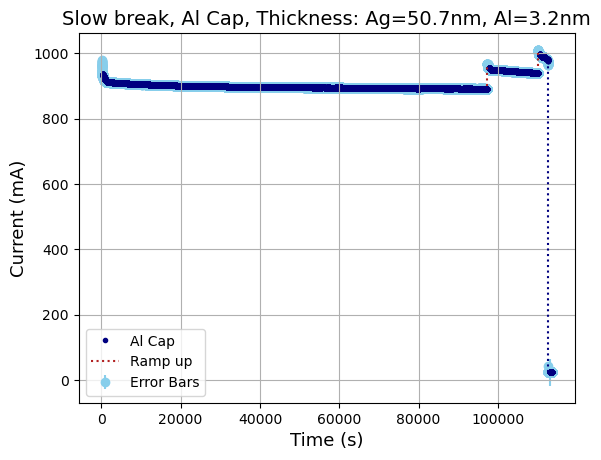

In [712]:
plt.plot(df_slow_Al['Fuse Currents'][0:97287].rolling(window=500).mean(),'o',markersize=3,color='navy',zorder=1,label='Al Cap')
plt.plot(df_slow_Al['Fuse Currents'][97287:110107].rolling(window=500).mean(),'o',markersize=3,color='navy',zorder=1)
plt.plot(df_slow_Al['Fuse Currents'][110107:112591].rolling(window=500).mean(),'o',markersize=3,color='navy',zorder=1)
plt.plot(df_slow_Al['Fuse Currents'][112591:].rolling(window=500).mean(),'o',markersize=3,color='navy',zorder=1)

plt.vlines(x = 112591,ymin =25, ymax = 960,ls=':',color = 'Navy')

#plt.plot(df_fuse['Fuse Currents'],'o',alpha=0.2,color='skyblue',zorder=0)

err1 = (df_slow_Al['Fuse Currents'][0:97287]).rolling(window=500).std()
err2 = df_slow_Al['Fuse Currents'][97287:110107].rolling(window=500).std()
err3 = df_slow_Al['Fuse Currents'][110107:112591].rolling(window=500).std()
err4 = df_slow_Al['Fuse Currents'][112591:].rolling(window=500).std()

#plt.plot(clean_data(run_Al_seed_1[:,1]),'o',markersize=3,color='teal',label='Seed')
#plt.plot(clean_data(run_ag_slow[:,1]),'o',markersize=3,color='skyblue',label='Silver')

index1 = np.arange(0,97287,1)
index2 = np.arange(97287,110107,1)
index3 = np.arange(110107,112591,1)
index4 = np.arange(112591,113668,1)


plt.errorbar(index1,df_slow_Al['Fuse Currents'][0:97287].rolling(window=50).mean(),yerr=err1,color='skyblue',fmt='o',zorder=0,label='Error Bars')
plt.errorbar(index2,df_slow_Al['Fuse Currents'][97287:110107].rolling(window=50).mean(),yerr=err2,color='skyblue',fmt='o',zorder=0)
plt.errorbar(index3,df_slow_Al['Fuse Currents'][110107:112591].rolling(window=50).mean(),yerr=err3,color='skyblue',fmt='o',zorder=0)
plt.errorbar(index4,df_slow_Al['Fuse Currents'][112591:].rolling(window=50).mean(),yerr=err4,color='skyblue',fmt='o',zorder=0)

plt.vlines(x = 97287,ymin =900, ymax = 960,ls=':',color = 'firebrick')
plt.vlines(x = 110107,ymin =960, ymax = 1000,ls=':',color = 'firebrick',label='Ramp up')

plt.title('Slow break, Al Cap, Thickness: Ag=50.7nm, Al=3.2nm',fontsize=14)
plt.ylabel('Current (mA)',fontsize=13)
plt.xlabel('Time (s)',fontsize=13)
plt.grid()
plt.legend()